# Name : Pankaj Chaudhari

# Roll No. : 119

# Batch No. : A1

## KNN In Medical Industry - Study Case Heart Disease

#### The steps in solving the Classification Problem using KNN are as follows:
1. Load the library
2. Load the dataset
3. Sneak peak data
4. Handling missing values
5. Exploratory Data Analysis (EDA)
6. Modeling
7. Tuning Hyperparameters

### Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv('heart.csv')

### Sneak Peak Data

In [3]:
#View the top 5 data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#View the bottom 5 data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#View the number of rows (303) and the number of columns
df.shape

(303, 14)

In [6]:
#General information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Handling Missing Values

In [7]:
#The data is clean and can proceed to the EDA stage
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='target', ylabel='count'>

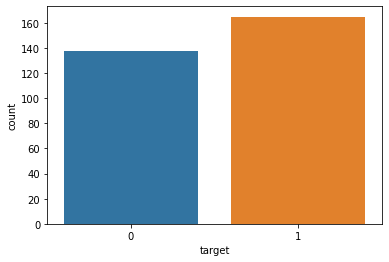

In [8]:
#Univariate analysis target.
sns.countplot(df['target'])

- Looks like it's already balanced because the sum of the values ​​0 and 1 doesn't differ much.
- Value 0 for Heart Disease.
- Value 1 for No Heart Disease.

<AxesSubplot:xlabel='age'>

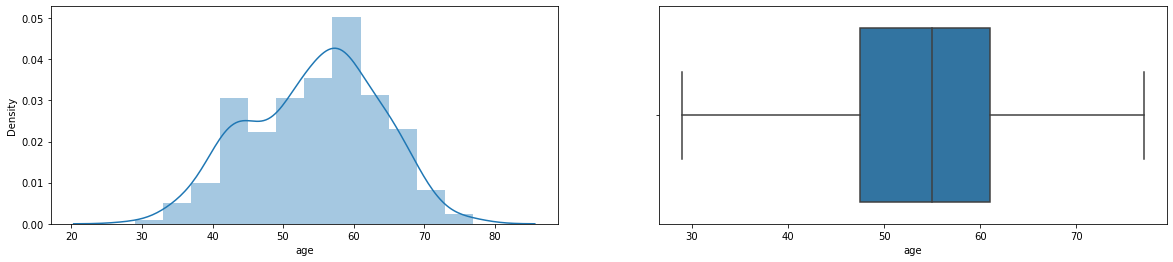

In [9]:
#Univariate analysis age.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['age'])

f.add_subplot(1,2,2)
sns.boxplot(df['age'])

- From the distplot, it can be seen that the density of the data lies in the range of 50-60 years and very rarely patients aged 30 years and under or 80 years and over.
- The boxplot shows that the data does not have outliers.

<AxesSubplot:xlabel='fbs', ylabel='count'>

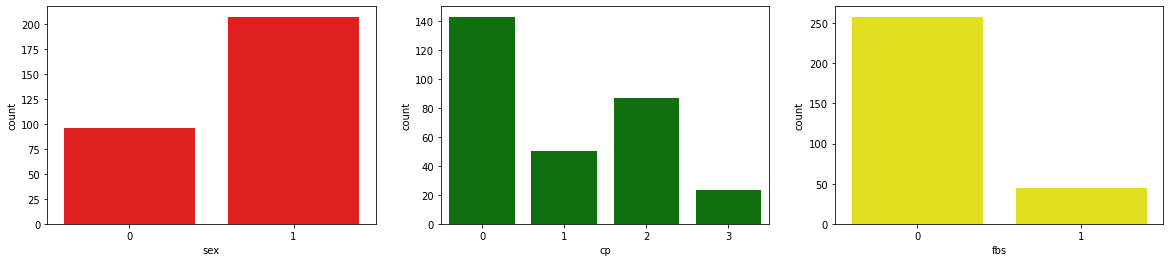

In [10]:
#Univariate analysis sex: 1=male; 0=female.
#Univariate analysis chest pain type (cp): 0=typical angina; 1=atypical angine; 2=non-anginal pain; 3=asymptomatic
#Univariate analysis fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(df['sex'], color='red')

f.add_subplot(1,3,2)
sns.countplot(df['cp'], color='green')

f.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

- Male/male patients have more than 2x the number of female/female patients.
- Most patients have cp 0 type, which is typical angina, and at least type 3, asymptomatic.
- The graph above shows that there are a lot of fasting blood sugar values ​​below 120 or 0.

<AxesSubplot:xlabel='trestbps'>

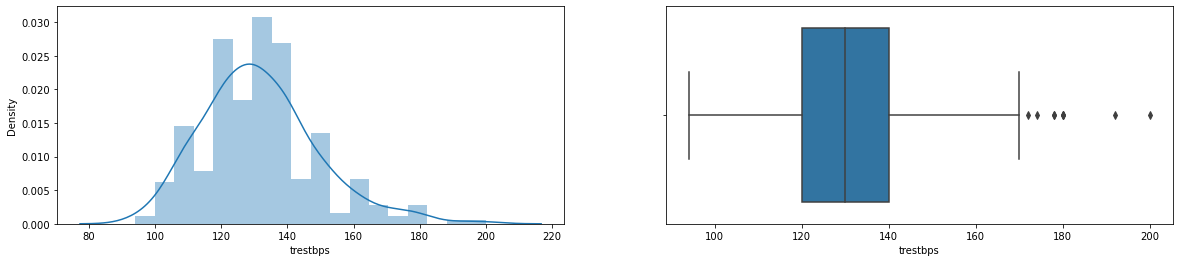

In [11]:
#Univariate analysis resting blood pressure (mm Hg) or trestbps.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['trestbps'])

f.add_subplot(1,2,2)
sns.boxplot(df['trestbps'])

- The resting blood pressure or trestbps value is at most 120 - 140 mmHg.
- The features of trestbps have some outliers.

<AxesSubplot:xlabel='chol'>

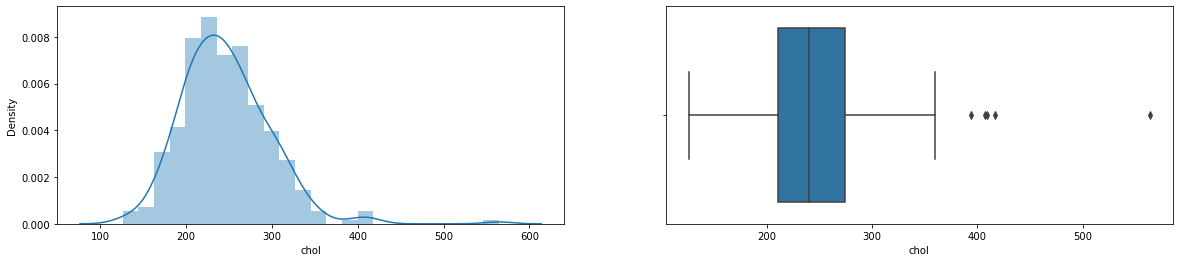

In [12]:
#Univariate analysis serum cholestrol (mg/dl) or chol.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['chol'])

f.add_subplot(1,2,2)
sns.boxplot(df['chol'])

- For serum cholesterol, it is concentrated in the range of 200-300 mg/dl.
- Features chol has some outliers.

<AxesSubplot:xlabel='thalach'>

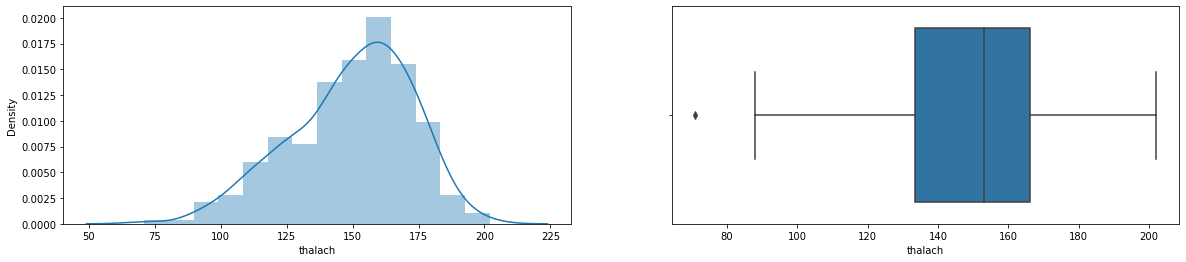

In [13]:
#Univariate analysis maximum heart rate achieved or thalach.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['thalach'])

f.add_subplot(1,2,2)
sns.boxplot(df['thalach'])

- Distplot shows that the value of the maxium heart rate or thalass is the densest in the range of 130 - 175. 
- Boxpplot shows that there is 1 outlier whose value is below 80.

<AxesSubplot:xlabel='slope', ylabel='count'>

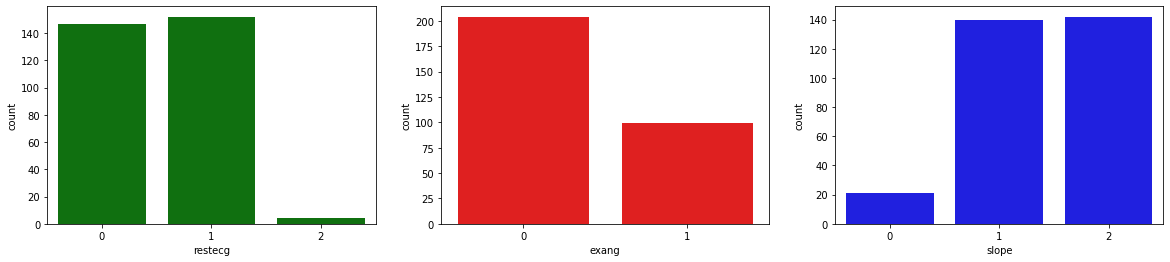

In [14]:
#Univariate analysis resting electrocardiographic results atau restecg.
#0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy.
#Univariate analysis exercise induced angina or exang.
# 1=yes; 0=no.
#Univariate analysis the slope of the peak exercise ST segment.
#0=upsloping; 1=flat; 2=downsloping.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(df['restecg'], color='green')

f.add_subplot(1,3,2)
sns.countplot(df['exang'], color='red')

f.add_subplot(1,3,3)
sns.countplot(df['slope'], color='blue')

- It can be seen that the values of 0 and 1 are almost balanced but the value of 2 on the restecg features is very little, which is below 10.
- The value of 0 is about 2 times higher than the value of 1, which means that patients do not experience induced angina during exercise more than those who experience induced angina during exercise. 
- Features slope value 1, which is flat and 2, which is downsloping, has almost the same value, which is around 140 and a value of 0, where it is upsloping, which has very little value, which is around 20.

<AxesSubplot:xlabel='oldpeak'>

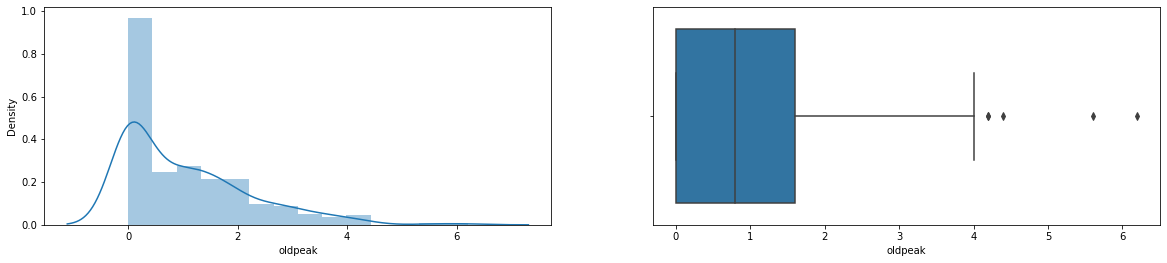

In [15]:
#Univariate analysis ST depression induced by exercise relative to rest.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['oldpeak'])

f.add_subplot(1,2,2)
sns.boxplot(df['oldpeak'])

- Dari distplot dapat dilihat bahwa features oldpeak terpusat di angka 0.
- Features oldpeak memiliki beberapa outlier diatas nilai 4.

<AxesSubplot:>

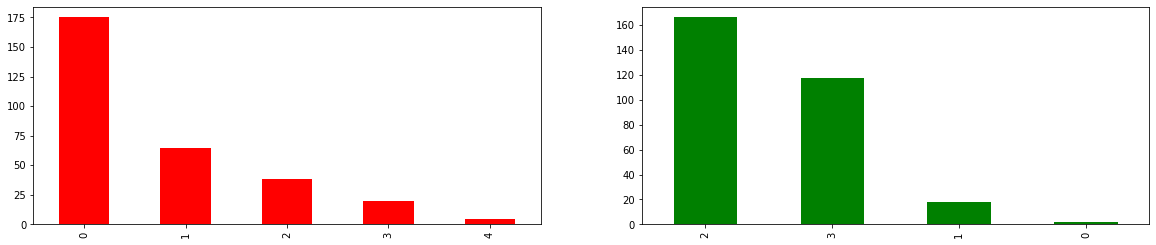

In [16]:
#Univariate analysis ca number of major vessels (0-3) colored by flourosopy.
#Univariate analysis thal.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
df['ca'].value_counts().plot(kind='bar', color='red')

f.add_subplot(1,2,2)
df['thal'].value_counts().plot(kind='bar', color='green')

- For features ca, the maximum value is 0 which has 0 major vessels and the minimum is 4. 
- As for the features thal most of the value is 2 and the least is a value of 0.

In [17]:
#Looking for correlation values between features.
df.corr().style.background_gradient().set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


- There is a fairly strong positive linear relationship between the target with cp, thalach, and slope. 
- As for the negative linear relationship, the target has a strong relationship with exang, oldpeak, ca, and thal.

### Modelling

In [18]:
#Make object KNN
knn = KNeighborsClassifier()

In [19]:
#Make variable x dan y
x = df.drop(columns=['target'])
y = df['target']

In [20]:
#Split data into the training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [21]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
#Predict testing set
y_pred = knn.predict(x_test)

In [23]:
#Check model performance using classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.65      0.61      0.63        36

    accuracy                           0.57        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.58      0.57      0.58        61



In [24]:
#Check the performance of the model using the auc score
roc_auc_score(y_test, y_pred)

0.5655555555555556

- From the classification report, it can be seen that the model has an average performance of around 57% starting from precision, recall, f1-score, and support. Accuracy also shows an accuracy of 57%. 
- Then for the score from the AUC it can be seen that the value is around 56.5% 
- This result is very far below the Logistic Regression algorithm which has a performance of around 89%.

### Hyperparameter Tuning using Grid Search

In [25]:
#List Hyperparameters to be tested
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [26]:
#Turn into a dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [27]:
knn_2 = KNeighborsClassifier()

In [28]:
#cv is cross validation
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [29]:
best_model = clf.fit(x,y)

In [30]:
#The best hyperpameters value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 7


In [31]:
y_pred = best_model.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.81      0.81      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [33]:
roc_auc_score(y_test, y_pred)

0.7627777777777778

But even though the performance has improved at 76%, One thing that I tried to improved performance is rescaling using StandardScalar.
This is the output which i got...

### First Rescaling uses Standard Scaling using Scikit-Learn Library StandardScaler()

In [35]:
from sklearn.metrics import accuracy_score

#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = df_model.drop(columns=['target'])
y = df_model['target']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using roc
roc_auc_score(y_test, y_pred)

0.8524590163934426


0.8383333333333333

From the value above, we can see that the performance of knn model increase to values around 85% in accuracy and about 83% in ROC with StandardScaler!

### Next rescaling is using Robust Scaling to handle the presences of outliers in our data.

In [36]:
#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = df_model.drop(columns=['target'])
y = df_model['target']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using roc
roc_auc_score(y_test, y_pred)

0.8360655737704918


0.8183333333333332

With RobustScaler, the accuracy is at 83% and the ROC in 81%. Its performance is under Standard Scaler

### The last rescaling uses Min-Max Scaling that use minimal and maximal value from features

With MinMax Scaler, the performance of model is highest among other rescaling methods with accuracy in 86% and ROC at 87%!

#### To get optimal performance, I used GridCV to Tune Hyperparameters of my KNN model.

In [37]:
#List Hyperparameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Making model
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(x_train,y_train)
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
y_pred = best_model.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using ROC
roc_auc_score(y_test, y_pred)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 25
0.8852459016393442


0.8661111111111112

With tuning hyperparameters + rescaling its performance is slightly the same with MinMaxScaling performance without tuning hyperparameters.

From what we have done it can be concluded that performance of distance-based algorithms such as KNN are also influenced by the scale / units of features. Therefore rescaling features is one way that can be used to improve the performance of Distance-based algorithms such as KNN.